# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [67]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('ggplot')

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [68]:
# loading the data:

customers = pd.read_csv('../data/Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

### What does each column mean?

In [69]:
# Let's check each column and how it looks like
customers.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [70]:
customers.shape

(440, 8)

In [71]:
customers.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [107]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,total_sales
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000


We can see from the UCI Machine Learning codebook that each column means: 

1) FRESH: annual spending (m.u.) on fresh products (Continuous);

2) MILK: annual spending (m.u.) on milk products (Continuous);

3) GROCERY: annual spending (m.u.)on grocery products (Continuous);

4) FROZEN: annual spending (m.u.)on frozen products (Continuous)

5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)

6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);

7) CHANNEL: customers Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)

8) REGION: customers Region “ Lisnon, Oporto or Other (Nominal) 

## Any categorical variable?

From the cells above we can see that there is a total amount of 440 observation and 8 features for each observation.

All the columns are considered as integers, even if some of them should be considered as Categorical variables: 

- Channel 
- Region 

These two categorical variables are described on UCI Machine Learning as: 

7) CHANNEL: customers Channel - Horeca (Hotel/Restaurant/Café) or Retail channel (Nominal)

8) REGION: customers Region “ Lisbon, Oporto or Other (Nominal)

Later, when we want to deal with these variables that are considered as categorical to be encoded as dummy variables and be treated as categorical 

## Any missing value?

In [72]:
# checking the amount of missing values we have in our dataset

customers.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

We don't have missing values in our dataset. 

## Column collinearity - any high correlations?

To check collinearity between columns we will do a heatmap to check the collinearity between columns. 

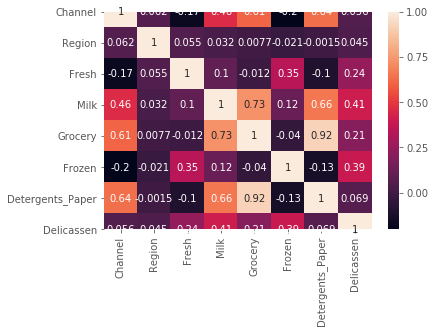

In [73]:
sns.heatmap(customers.corr(), annot=True)

We can see that there are two columns that are extremely correlated, that are Detergents_Paper and Grocery 

## Descriptive statistics - any outliers to remove?


/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


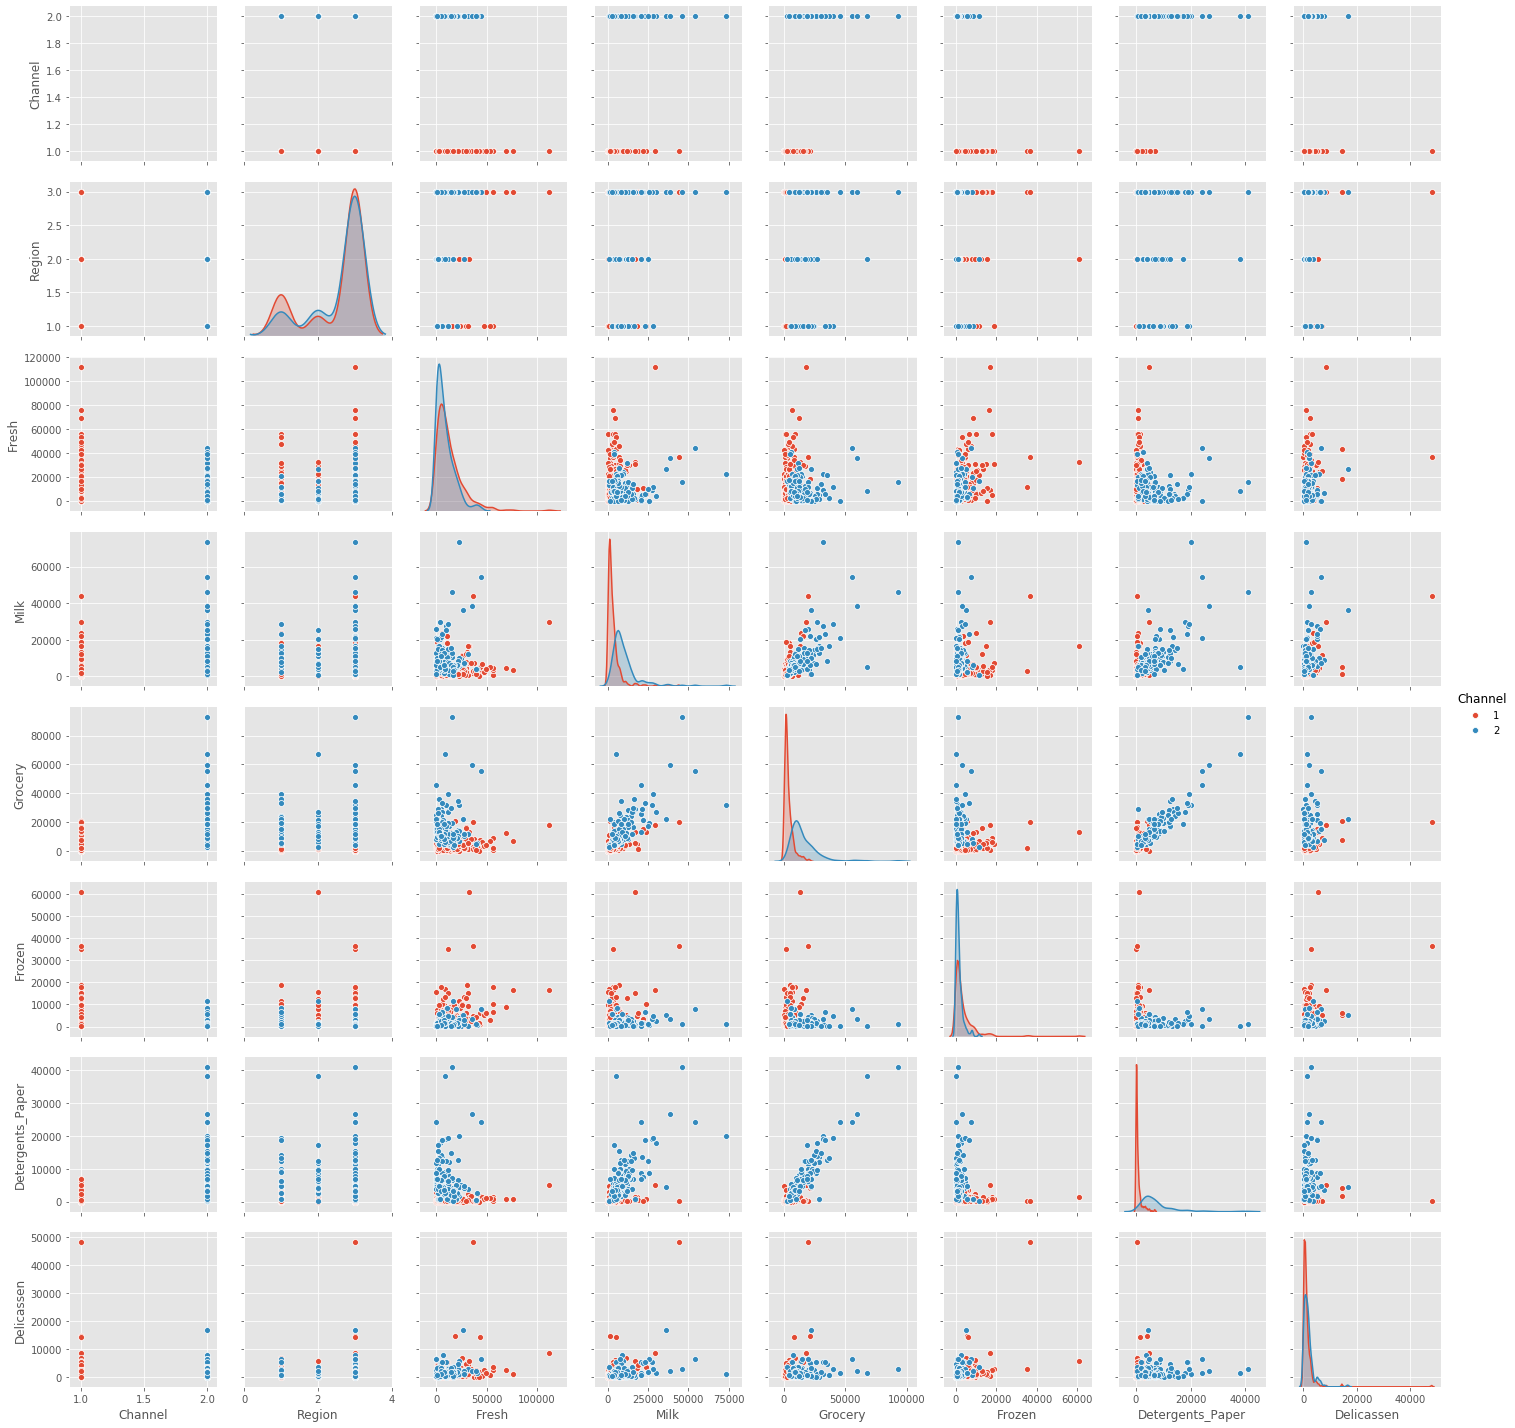

In [13]:
sns.pairplot(customers, hue='Channel')

As we can see from the pairplot, there are some outliers in our graph, and it can also be seen in the distribution plot. However, since we have different channels to sell food, being HORECA and small customers, as well as others. However, we are not going to remove these outliers since we would consider all the sells of our markets. Furthermore, according to the Pareto principle, the 20% of all the customers buy an amount of food accounting for the 80% of the total sales. 

## Column-wise data distribution - is the distribution skewed?
As we can see from the figure above, the distribution is not normally distributed. Data is skewed to the left. 



## Pareto principle check 

The pareto principle checks that 20% of the customers account for 80% of the total sales. Each row accounts for a client. Then, we can try to prove this statement. 

In [74]:
# Create a new column that is the total_sales

customers['total_sales'] = customers.iloc[:, 2:].sum(axis=1)

In [83]:
customers.iloc[0, 2:8].sum()

34112

In [84]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,total_sales
0,2,3,12669,9656,7561,214,2674,1338,34112
1,2,3,7057,9810,9568,1762,3293,1776,33266
2,2,3,6353,8808,7684,2405,3516,7844,36610
3,1,3,13265,1196,4221,6404,507,1788,27381
4,2,3,22615,5410,7198,3915,1777,5185,46100


In [85]:
customers_sorted = customers.sort_values(by='total_sales', ascending=False)

In [86]:
customers_sorted['cum_sum'] = customers_sorted['total_sales'].cumsum()

In [87]:
total_sales = customers_sorted['total_sales'].sum(axis=0)

In [103]:
# Calculation of the total sales 
total_sales

14619500

In [89]:
# Calculation of the % of total sales accumulated. 

customers_sorted['cum_perc'] = (customers_sorted['cum_sum'] / total_sales) * 100  

In [90]:
customers.shape

(440, 9)

In [91]:
customers_sorted[customers_sorted['cum_perc'] <= 80].shape[0]

251

In [92]:
((customers_sorted[customers_sorted['cum_perc'] <= 80].shape[0])/customers.shape[0]) * 100

57.04545454545455

In [93]:
customers.shape[0] * 0.2

88.0

In [94]:
customers_sorted.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,total_sales,cum_sum,cum_perc
85,2,3,16117,46197,92780,1026,40827,2944,199891,199891,1.367290
47,2,3,44466,54259,55571,7782,24171,6465,192714,392605,2.685489
181,1,3,112151,29627,18148,16745,4948,8550,190169,582774,3.986279
183,1,3,36847,43950,20170,36534,239,47943,185683,768457,5.256384
61,2,3,35942,38369,59598,3254,26701,2017,165881,934338,6.391039


In [95]:
customers_sorted.iloc[:89, :]['total_sales'].sum()

6319384

In [96]:
(customers_sorted.iloc[:89, :]['total_sales'].sum() / total_sales) * 100

43.225719073839734

In this case, the pareto principle is not followed by the data we have. 

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [ ]:
# Your code here

In [105]:
# Since we are working with data that comes from sales, we don't need to remove these two outliers we have. 
# They could be huge sale for one client that comes from a HoReCa. 

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [108]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,total_sales
0,2,3,12669,9656,7561,214,2674,1338,34112
1,2,3,7057,9810,9568,1762,3293,1776,33266
2,2,3,6353,8808,7684,2405,3516,7844,36610
3,1,3,13265,1196,4221,6404,507,1788,27381
4,2,3,22615,5410,7198,3915,1777,5185,46100


In [109]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

# We drop the column "total_sales", since it is not required for this challenge 
customers_df = customers.drop(['total_sales'], axis=1)

In [115]:
scaler = StandardScaler()

scaler.fit(customers_df)

customers_scale = pd.DataFrame(scaler.transform(customers_df))

In [117]:
customers_scale.head()

,0,1,2,3,4,5,6,7
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [129]:
from sklearn.cluster import KMeans

# We assume 6 clusters 
kmeans = KMeans(n_clusters=6)

# Fitting the input data
kmeans.fit(customers_scale)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [130]:
customers['labels'] = kmeans.labels_

Count the values in `labels`.

In [131]:
customers['labels'].value_counts()

0    179
5    124
2     87
3     38
1     11
4      1
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [ ]:
# Your code here


Count the values in `labels_DBSCAN`.

In [ ]:
# Your code here


# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [ ]:
# Your code here:


Which algorithm appears to perform better?

In [ ]:
# Your observations here

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here